In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

In [27]:
df = pd.read_csv('../data/Dispensation_Data.csv')

In [28]:
###Keeping age groups, removing all ages ## will have to do Genders seperatly as 
##They don't count them together
dfage = df[df['Age Group'] != 'All Ages']


In [29]:
dfage.head()

,County Name,Rate or Count,Type of Drug Class,Type of Rate or Count Measure,Age Group,Gender,Time Measure,Year,Time Period,Quarter Date Start,Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,Warren,156.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),15-24,All Genders,Quarterly Counts,2017,2017 Q4,10/01/2017,NaN,62,62,42,123,41.816752,-79.278582,POINT (-79.27858158 41.81675237)
1,Carbon,3017.03,Opioids (All Schedules) - excluding Buprenorphine,Rate of Prescriptions (by patient location) pe...,35-44,All Genders,Quarterly Rates,2016,2016 Q3,07/01/2016,NaN,13,13,42,25,40.919367,-75.711070,POINT (-75.71107039 40.91936701)
3,Wayne,3113.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),55-64,All Genders,Quarterly Counts,2016,2016 Q3,07/01/2016,NaN,64,64,42,127,41.649698,-75.305154,POINT (-75.3051535 41.64969805)
4,Lancaster,403.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),0-14,All Genders,Quarterly Counts,2017,2017 Q4,10/01/2017,NaN,36,36,42,71,40.045908,-76.251388,POINT (-76.25138768 40.04590796)
5,Chester,19635.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),65+,All Genders,Quarterly Counts,2018,2018 Q1,01/01/2018,NaN,15,15,42,29,39.974871,-75.756265,POINT (-75.75626498 39.97487056)


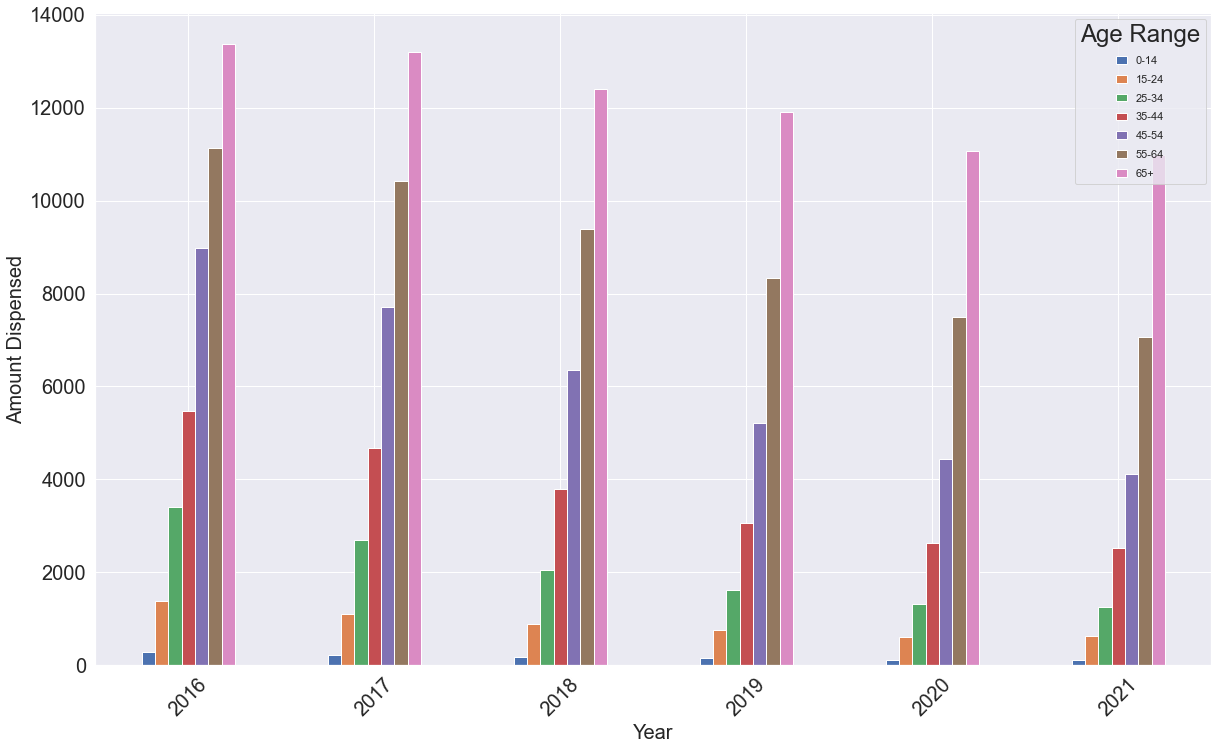

In [30]:

plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
dfage.groupby(['Year', 'Age Group'])['Rate or Count'].mean().unstack().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Year', fontsize=20)
plt.ylabel(ylabel = 'Amount Dispensed', fontsize=20)
plt.legend(borderpad=.5, labelspacing=.8,handlelength=1,fontsize = 11, title = 'Age Range')
plt.show()

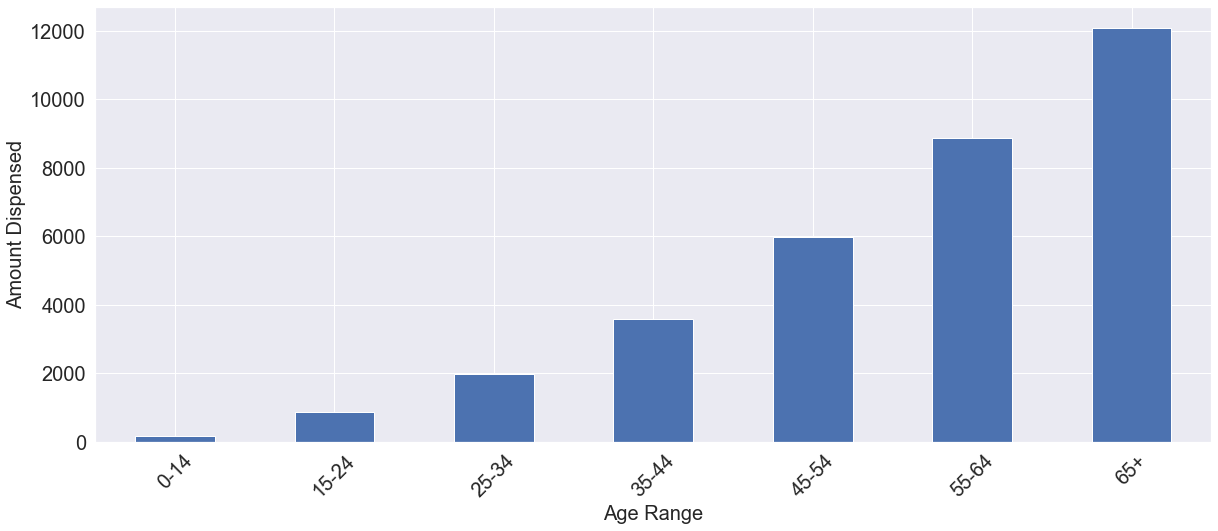

In [32]:
plt.rcParams["figure.figsize"] = (20,8)
sns.set(font_scale = 2)
dfage.groupby('Age Group')['Rate or Count'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Age Range', fontsize=20)
plt.ylabel(ylabel = 'Amount Dispensed', fontsize=20)
plt.show()

In [ ]:
### Showing an upward trend with age

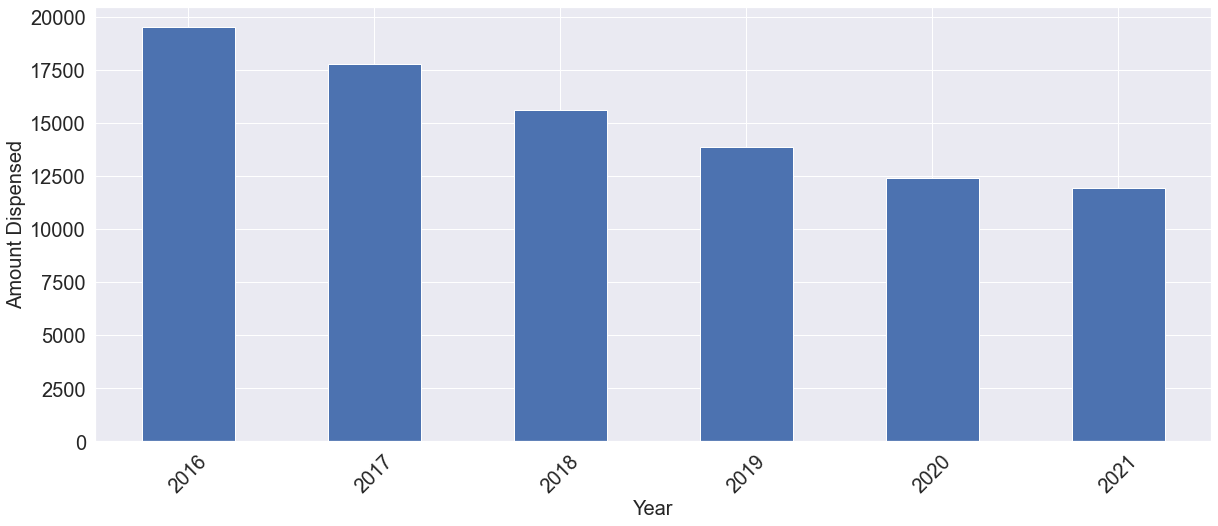

In [41]:
plt.rcParams["figure.figsize"] = (20,8)
sns.set(font_scale = 2)
dfage.groupby('Year')['Rate or Count'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Year', fontsize=20)
plt.ylabel(ylabel = 'Amount Dispensed', fontsize=20)
plt.show()

In [44]:
### Showing a downward trend with dispensing

<h2> By Gender 

In [45]:
df.head()

,County Name,Rate or Count,Type of Drug Class,Type of Rate or Count Measure,Age Group,Gender,Time Measure,Year,Time Period,Quarter Date Start,Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,Warren,156.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),15-24,All Genders,Quarterly Counts,2017,2017 Q4,10/01/2017,NaN,62,62,42,123,41.816752,-79.278582,POINT (-79.27858158 41.81675237)
1,Carbon,3017.03,Opioids (All Schedules) - excluding Buprenorphine,Rate of Prescriptions (by patient location) pe...,35-44,All Genders,Quarterly Rates,2016,2016 Q3,07/01/2016,NaN,13,13,42,25,40.919367,-75.711070,POINT (-75.71107039 40.91936701)
2,Monroe,28610.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),All Ages,All Genders,Quarterly Counts,2017,2017 Q2,04/01/2017,NaN,45,45,42,89,41.060918,-75.340836,POINT (-75.34083603 41.06091787)
3,Wayne,3113.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),55-64,All Genders,Quarterly Counts,2016,2016 Q3,07/01/2016,NaN,64,64,42,127,41.649698,-75.305154,POINT (-75.3051535 41.64969805)
4,Lancaster,403.00,Opioids (All Schedules) - excluding Buprenorphine,Number of Dispensations (by pharmacy location),0-14,All Genders,Quarterly Counts,2017,2017 Q4,10/01/2017,NaN,36,36,42,71,40.045908,-76.251388,POINT (-76.25138768 40.04590796)


In [46]:
dfage = df[df['Gender'] != 'All Genders']

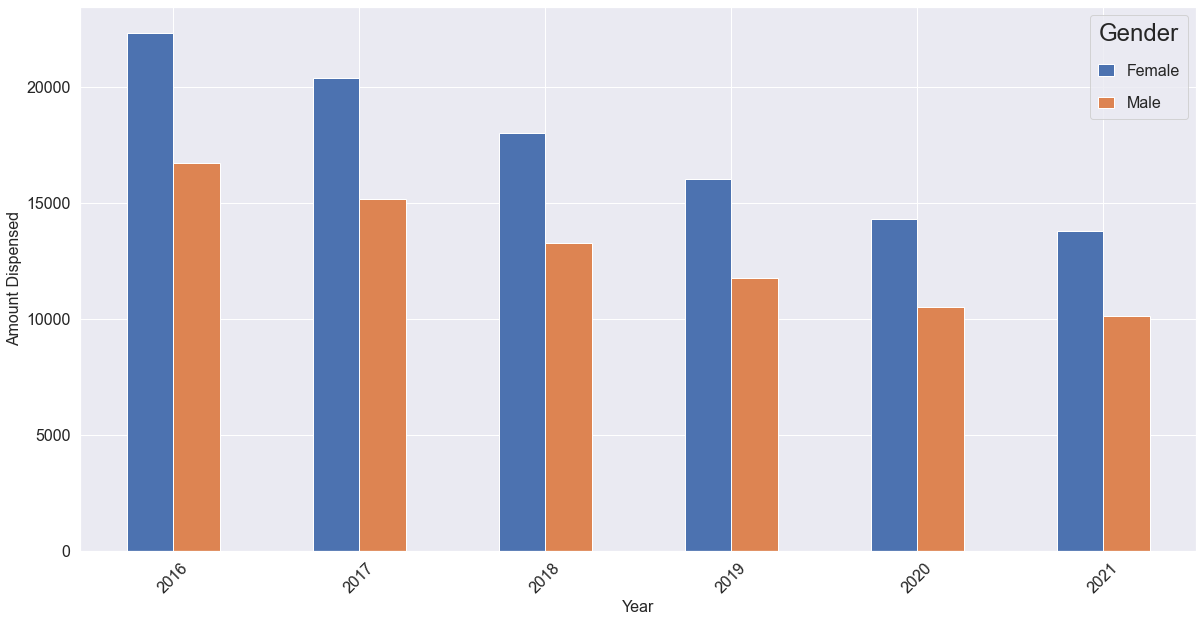

In [47]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set(font_scale = 2)
dfage.groupby(['Year', 'Gender'])['Rate or Count'].mean().unstack().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'Year', fontsize=16)
plt.ylabel(ylabel = 'Amount Dispensed', fontsize=16)
plt.legend(borderpad=.5, labelspacing=1.1,handlelength=1,fontsize = 16, title = 'Gender')
plt.show()

In [48]:
### Females are dispenced more often in neach year
##Both groups maintain a downward trend at about  the same level